In [126]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re
import glob
from datetime import datetime
import pickle

In [127]:
auth_tuple = re.compile(r'^\(\(([^,]*),([^,]*),([^\)]*)\),([0-9]*)')

In [148]:
year = "2011"
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/authorperday_counts/part-0*".format(year)
part_files = glob.glob(fn)

In [149]:
len(part_files)

2119

In [150]:
# Postings counts only
postings = {}
hour = {}
for f in part_files:
    for line in open(f,"r"):
        match = auth_tuple.match(line)
        if match:
            author = match.group(2)
            subreddit = match.group(1)
            dt = datetime.strptime(match.group(3).split('T')[0], '%Y-%m-%d')
            count = int(match.group(4))
            
            # accumulate postings
            if dt not in postings.keys():
                postings[dt]=count
            else:
                postings[dt] += count



In [151]:
# save the postings
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/postings.pkl".format(year)
of = open(fn, 'wb')
pickle.dump(postings, of, -1)
of.close()

In [ ]:
# 2008-12-13T00:00:00.000-06:00
postings = {}
hour = {}
for f in part_files:
    for line in open(f,"r"):
        match = auth_tuple.match(line)
        if match:
            author = match.group(2)
            subreddit = match.group(1)
            dt = datetime.strptime(match.group(3).split('T')[0], '%Y-%m-%d')
            count = int(match.group(4))
            if dt not in hour.keys():
                hour[dt]={subreddit: {author: count}}
            elif subreddit not in hour[dt].keys():
                hour[dt][subreddit]= {author: count}
            elif author not in hour[dt][subreddit]:
                hour[dt][subreddit][author] = count
            else:
                hour[dt][subreddit][author] += count
        

In [ ]:
#days = sorted(hour.keys())
#days_plot = []
#posts = []
#for i, day in enumerate(days):
#    posts_in_day = 0
#    for sr in hour[day].keys():
#        for a in hour[day][sr].keys():
#            posts_in_day += hour[day][sr][a]
#    posts.append(posts_in_day)
#    days_plot.append(day)    

In [135]:
days = sorted(postings.keys())
days_plot = []
posts = []
for i, day in enumerate(days):
    posts.append(postings[day])
    days_plot.append(day)

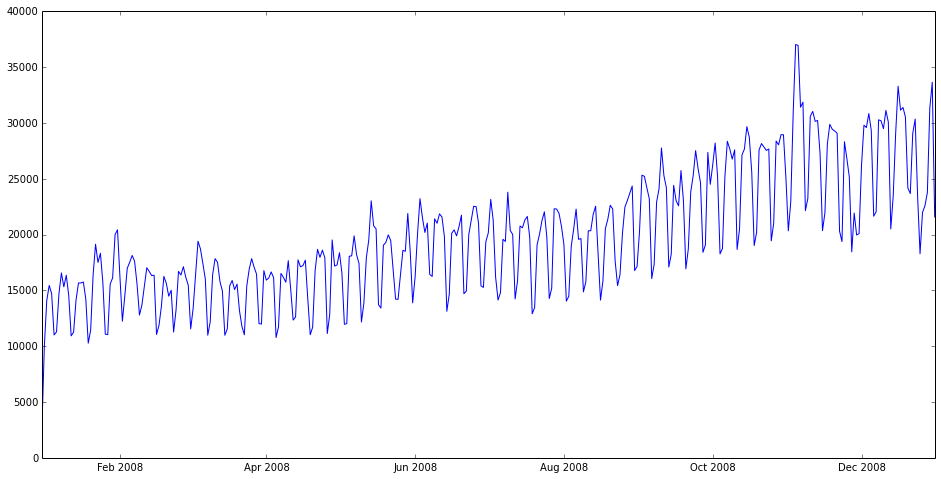

In [136]:
fig = plt.figure(figsize=(16,8))
p = plt.subplot(1,1,1)
plt.plot(days_plot, posts)

In [125]:
len(postings)


367

In [7]:
match.group(2)

'Khendroc'

In [8]:
match.group(3)

'2008-12-13T00:00:00.000-06:00'

In [9]:
match.group(4)

'6'